# Свойства оценок

1 задание (к теоретической задаче 1): 

Сгенерируйте выборку $X_1$...$X_n$ из равномерного распределения на отрезке [0, θ]  для N = $10^{4}$

Для всех n<=N почитайте оценки параметры θ из теоретической задачи: 2*Xaverage, Xaverage + X(n)/2, (n+1)*X(1),         X(1)+X(n), (n+1)/n * X(n)

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения         θ в зависимоссти от n

Какая оценка получилась лучше (в смысле упомянутого модуля разности при n = N)? Проведите эксперимент для             различных θ

In [34]:
#импортируем необходимые библиотеки
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
#напишем функцию для вывода статистики
def Statistics (N, theta):
    #генерируем выборку из равномерного распределения
    X = sps.uniform.rvs(size = N, loc = 0, scale = theta)
    
    #создадим массивы для подсчета значений к каждой оценке
    #2(Xav)
    valuation1 = []
    #(Xav) + X(n)/2
    valuation2 = []
    #(n+1)X(1)
    valuation3 = []
    #X(1) + X(n)
    valuation4 = []
    #(n+1)/n * X(n)
    valuation5 = []
    
    max_value = X[0]
    min_value = X[0]
        
    
    #рассмотрим для всех i<N значения модуля разности оценки от истинного значения параметра 
    for i in range (0, N):
        #возьмем срезку выборки
        Xn = X[:i+1]
        
        #высчитаем максимум, минимум и среднее в выборке
        max_value = max(max_value, X[i]);
        min_value = min(min_value, X[i]);
        average = Xn.mean()
        
        #добавим значения в массивы
        valuation1.append(abs(2 * average - theta))
        valuation2.append(abs(average + max_value/2 - theta))
        valuation3.append(abs(i * min_value - theta))
        valuation4.append(abs(min_value + max_value - theta))
        valuation5.append(abs((i+2) / (i+1) * max_value - theta))
        
        

    #создадим соответствующие графики
    plt.figure(figsize = (20,10))
    plt.ylabel('$|\\theta - \\theta^*(n)|$', fontsize = 30)
    plt.xlabel('$X$', fontsize = 30)
    plt.title('$Для$' + ' ' + '$\\theta=$' + str(theta), fontsize = 50);
    plt.grid()
    
    #зададим предел значений по оси игрек, чтобы избавиться от больших значений в начале
    plt.ylim(0, theta/30)
        
    #опишем легенду    
    plt.plot(np.arange(1, N+1), valuation1, color = 'red', label='$2\overline{X}$');
    plt.plot(np.arange(1, N+1), valuation2, color = 'green', label='$\overline{X} + X_{(n)}/2$')
    plt.plot(np.arange(1, N+1), valuation3, color = 'yellow', label='$(n+1)X_{(1)}$')
    plt.plot(np.arange(1, N+1), valuation4, color = 'violet', label='$X_{(1)}+X_{(n)}$')
    plt.plot(np.arange(1, N+1), valuation5, color = 'blue', label=r'$\frac{n+1}{n} X_{(n)}$')
             
    plt.legend(loc='upper right', fontsize = 20)    
        
    plt.show()   

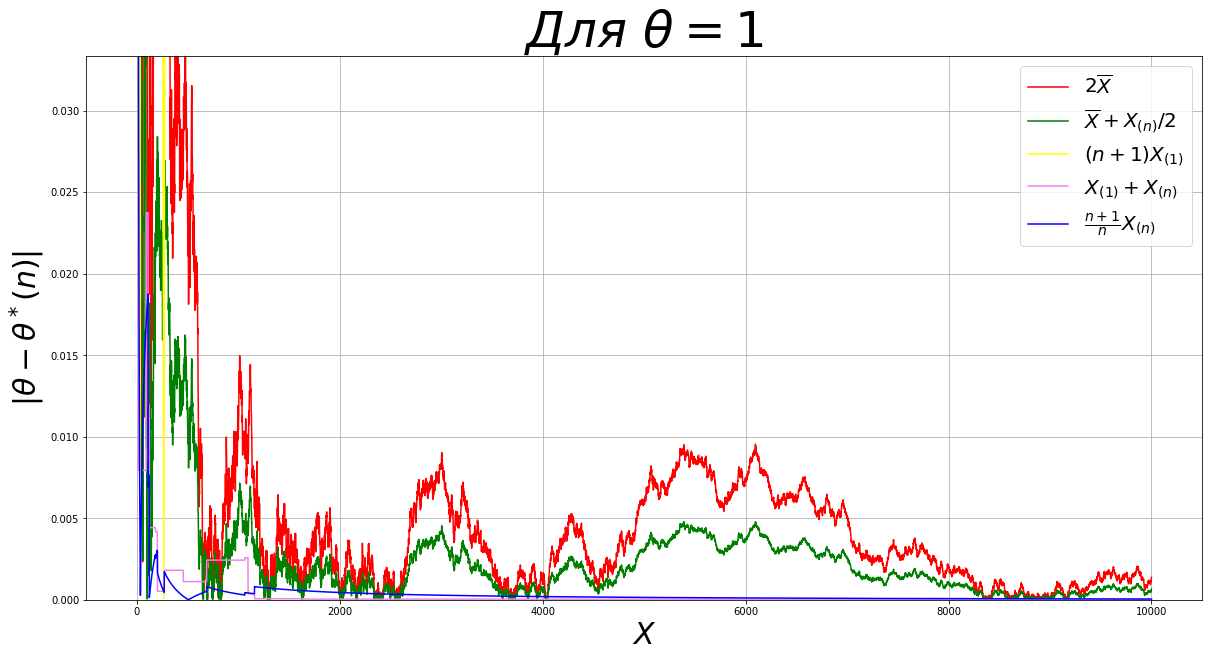

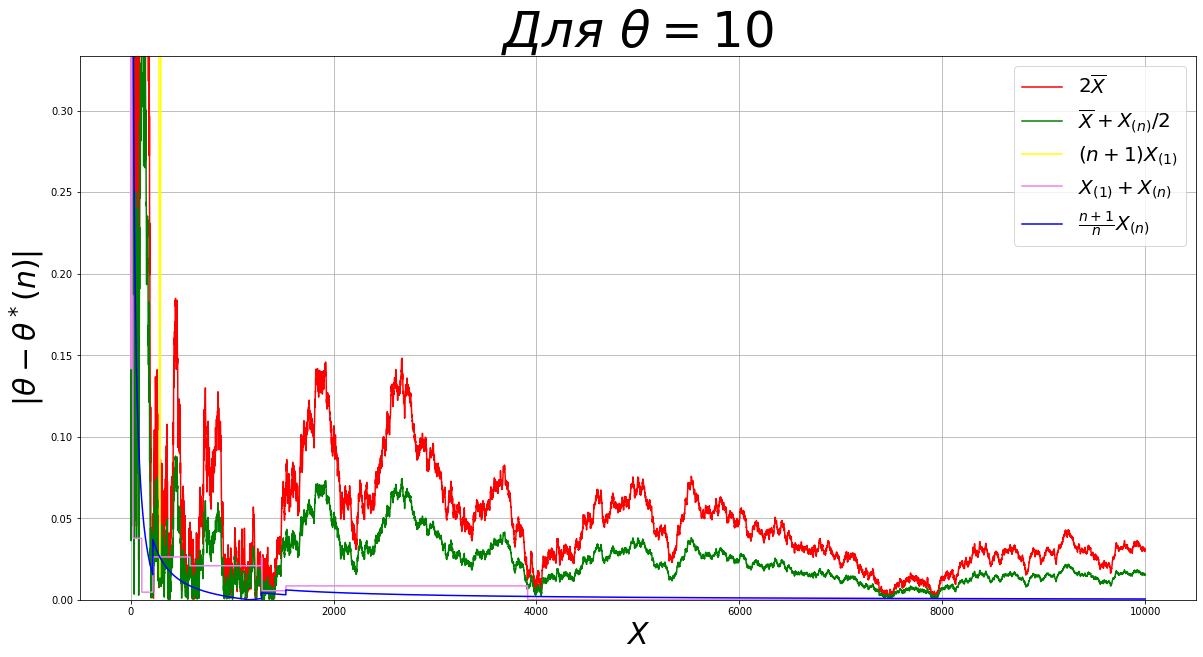

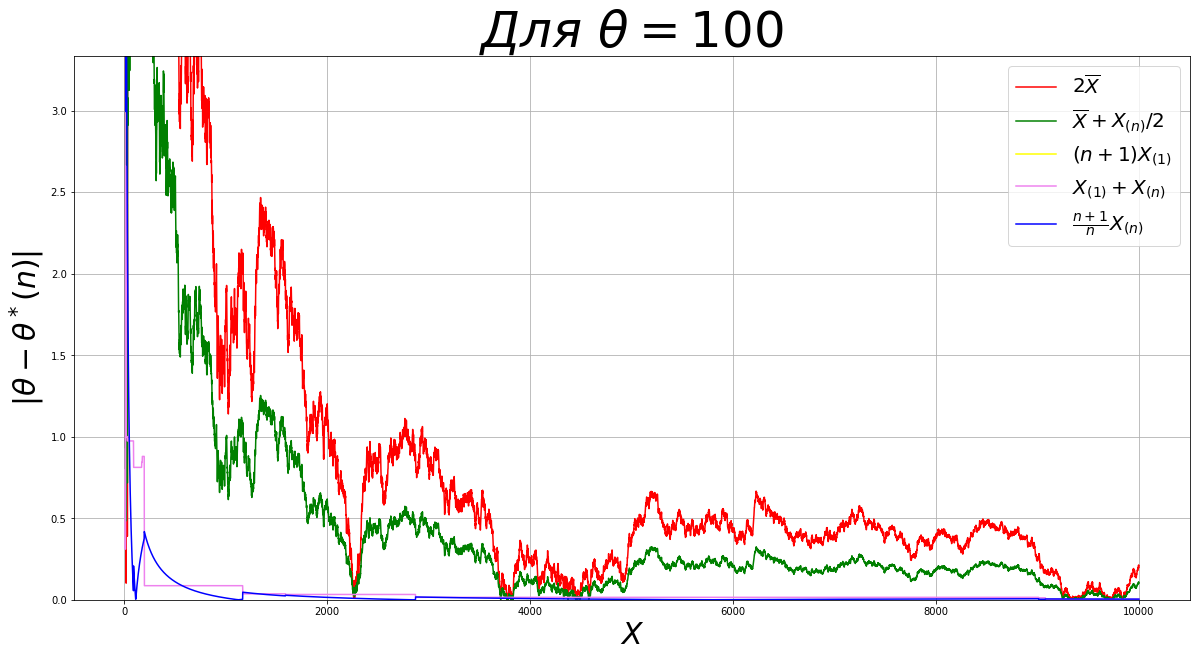

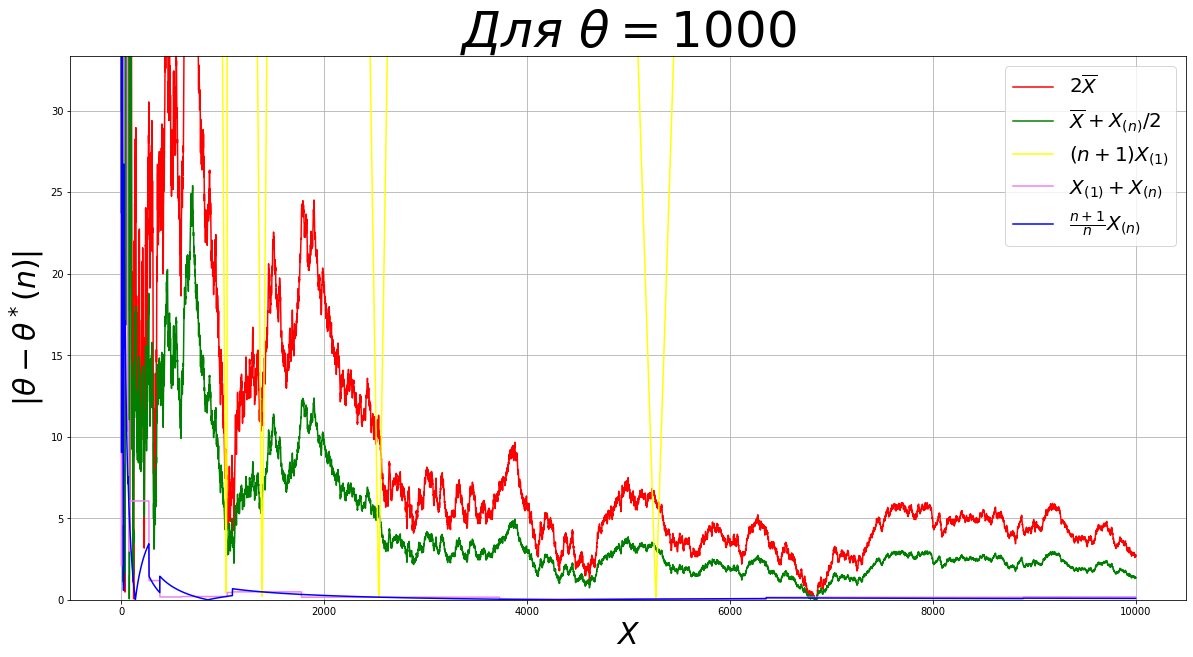

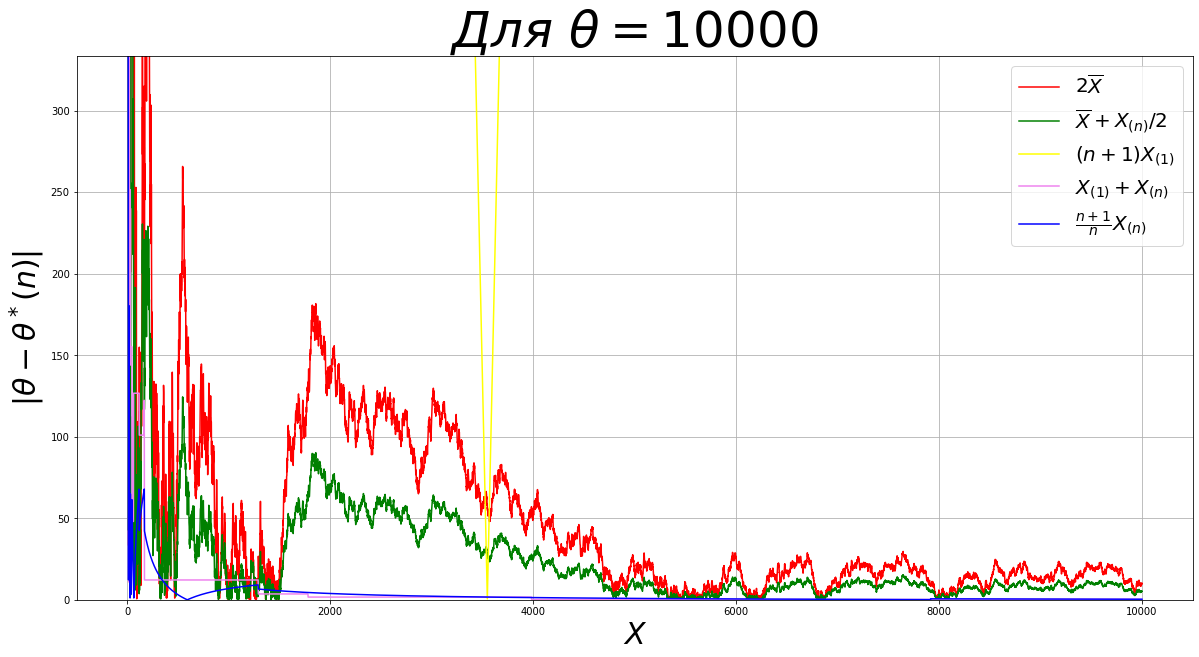

In [114]:
#проверим для разных значений параметра 
N = 10000
theta = 1
for i in range(0, 5) :
    Statistics(N, theta)
    theta *= 10

# Вывод:

При достаточно больших значениях функции модуля разности истинного значения параметра и оценки 4 и 5 стремится к 0, что свидетельствует о близости оценки к значению параметра, значит они лучше оценок 1-3 (а 3-я оценка вовсе несостоятельная, значит ее можно не сравнивать даже с другими), также видно, что оценка 2 лучше 3-й